Published on December 21, 2023. By Marília Prata, mpwolke

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:

from datasets import load_dataset
import pandas as pd

dataset = load_dataset("jerryjalapeno/nart-100k-synthetic")

human_values = []
gpt_values = []

for conversation in dataset['train']['conversations']:
    human_conv = [conv['value'] for conv in conversation if conv['from'] == 'human']
    gpt_conv = [conv['value'] for conv in conversation if conv['from'] == 'gpt']

    human_values.extend(human_conv)
    gpt_values.extend(gpt_conv)

max_len = max(len(human_values), len(gpt_values))

df = pd.DataFrame({'Human Values': human_values + [pd.NA] * (max_len - len(human_values)),
                   'GPT Values': gpt_values + [pd.NA] * (max_len - len(gpt_values))})

df.head()

,Human Values,GPT Values
0,I've been feeling so sad and overwhelmed latel...,"Hey there, I'm here to listen and support you...."
1,"I recently got a promotion at work, which I th...",I can understand how it can be overwhelming wh...
2,"Well, the workload has increased significantly...",It sounds like you're dealing with a lot of pr...
3,I've been trying to prioritize my tasks and de...,It's great to hear that you're already impleme...
4,You're right. I haven't really opened up about...,"It's completely normal to feel that way, but r..."


In [19]:
print("Total Null Values")
df.isnull().sum()

Total Null Values


given_name      0
Human Values    0
GPT Values      0
dtype: int64

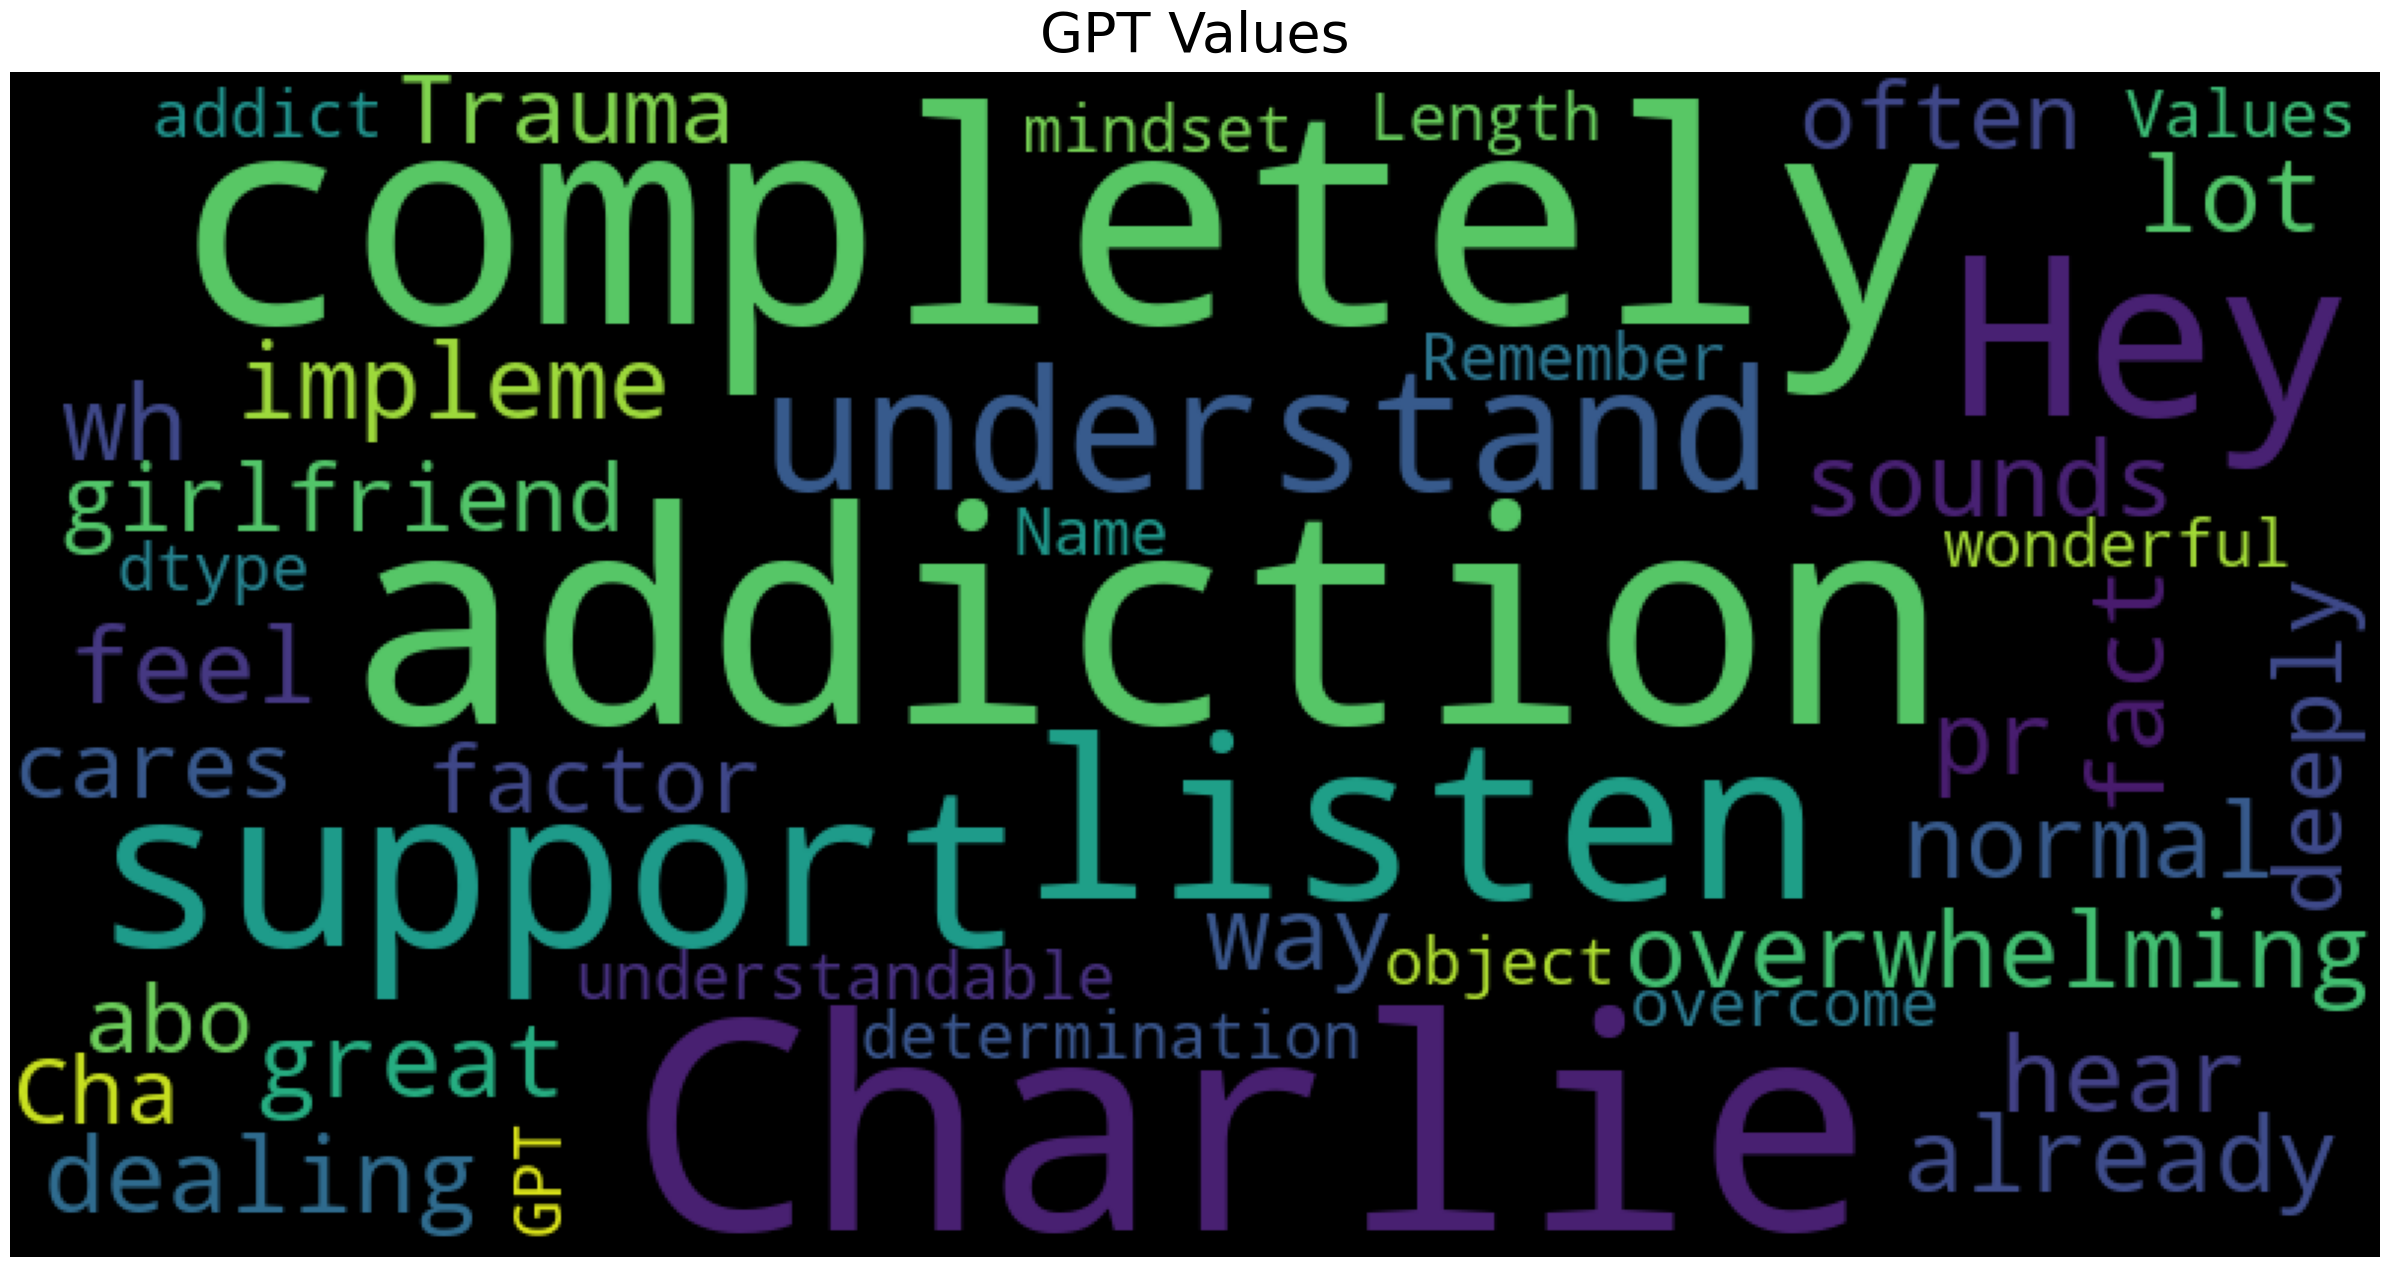

In [6]:

from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["GPT Values"], title="GPT Values")

In [7]:
from plotly import tools
from collections import defaultdict

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

freq_dict = defaultdict(int)
for sent in df["Human Values"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


freq_dict = defaultdict(int)
for sent in df["GPT Values"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Human Values", 
                                          "Frequent words of GPT Values"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [8]:


freq_dict = defaultdict(int)
for sent in df["Human Values"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df["GPT Values"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of Human Values", 
                                          "Frequent bigrams of GPT values"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

In [9]:
freq_dict = defaultdict(int)
for sent in df["Human Values"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df["GPT Values"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')


fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of Human Values", 
                                          "Frequent trigrams of GPT Values"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

In [10]:


def extract_given_name(s):
    '''Split name into parts.'''
    parts = s.split(',')

    parts = [part for part in parts if len(part)>0]
    return parts[1] if len(parts)>1 else ''
    

df['given_name'] = df['GPT Values'].apply(extract_given_name)


cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]


df.sort_values(by=['given_name',
                   'GPT Values']).to_csv('Patients sorted on given names')

In [11]:
df.head()

,given_name,Human Values,GPT Values
0,I'm here to listen and support you. It sounds...,I've been feeling so sad and overwhelmed latel...,"Hey there, I'm here to listen and support you...."
1,,"I recently got a promotion at work, which I th...",I can understand how it can be overwhelming wh...
2,it's crucial to take care of yourself,"Well, the workload has increased significantly...",It sounds like you're dealing with a lot of pr...
3,progress takes time,I've been trying to prioritize my tasks and de...,It's great to hear that you're already impleme...
4,but remember,You're right. I haven't really opened up about...,"It's completely normal to feel that way, but r..."


In [12]:
df["given_name"].value_counts()

given_name
                                                                                                                                                                                                 90993
 Charlie. Remember                                                                                                                                                                               49398
 Charlie                                                                                                                                                                                         21972
 Charlie. However                                                                                                                                                                                 6835
 Charlie. Sometimes                                                                                                                                                                              

In [13]:
cha = df[(df['given_name']==' Charlie')].reset_index(drop=True)
cha.tail(20)

,given_name,Human Values,GPT Values
21952,Charlie,I will join a local writing group and begin sh...,"I'm proud of you, Charlie, for embracing your ..."
21953,Charlie,"I've tried, but it's hard for me to put into w...","Grief is a unique experience for everyone, Cha..."
21954,Charlie,I feel like I'm holding back so much of myself...,"It's important to remember, Charlie, that you ..."
21955,Charlie,"They have definitely made a difference, Alex. ...",It's incredible how even the simplest acts of ...
21956,Charlie,"I can't believe it, Alex, but I actually feel ...","Oh, Charlie, it sounds like you're experiencin..."
21957,Charlie,"That's a good point, Alex. I haven't fully sha...","It's understandable that you might hesitate, C..."
21958,Charlie,I think my main concern is that she might not ...,"It's important, Charlie, to communicate your f..."
21959,Charlie,"I will give it a shot, Alex. It feels comforti...","Remember, Charlie, rebuilding takes time, and ..."
21960,Charlie,I think a major factor was moving around a lot...,"That must have been challenging for you, Charl..."
21961,Charlie,"You're right, Alex. I guess I've been hesitant...","Vulnerability, Charlie, is not a sign of weakn..."


In [14]:


cha.iloc[17,2]

'Forgiveness, Charlie, is not only about letting go of guilt but also about healing and finding inner peace. How do you think you can begin the process of forgiving yourself?'

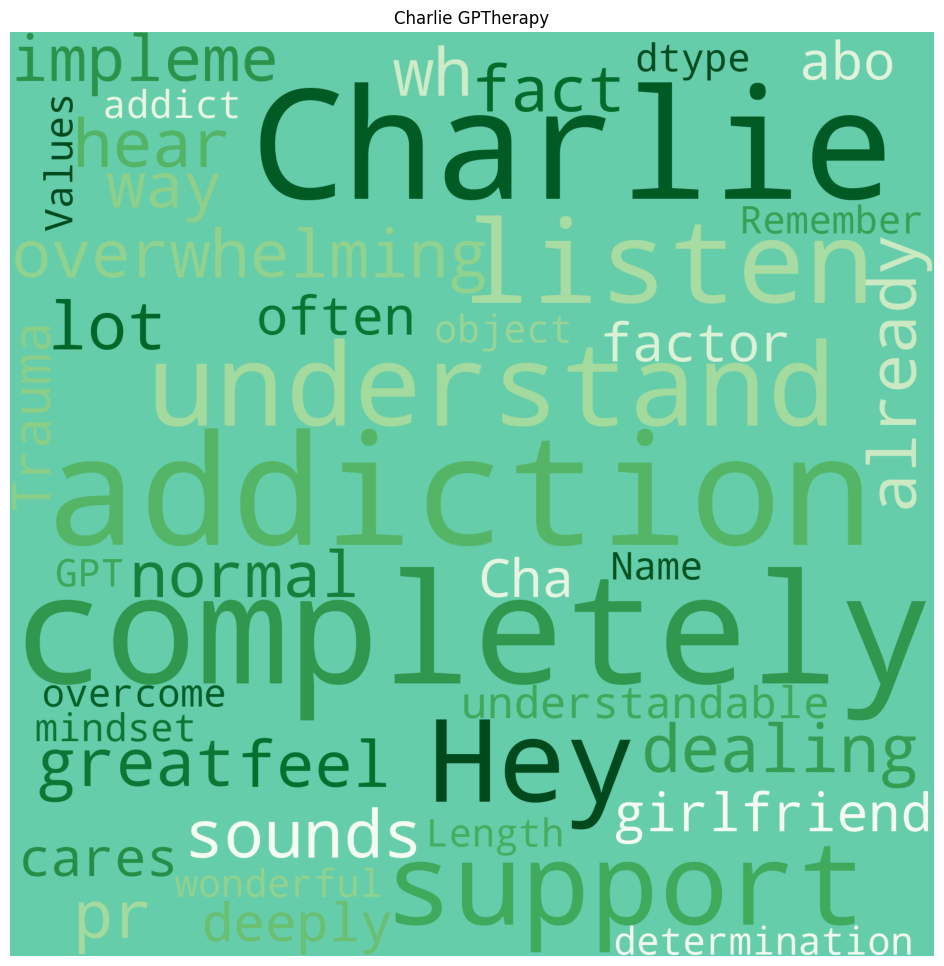

In [15]:


from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = '#66CDAA', #MediumAquaMarine the GPT color
                      colormap= "Greens",

                      height =2000,
                      width = 2000
                     ).generate(str(df["GPT Values"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Charlie GPTherapy")
plt.show()

In [16]:


cha.iloc[12,2]

"Rejection is always a possibility, Charlie, but it's important to take that chance and be honest and sincere. People can surprise us, and they may be more willing to forgive than you expect. It's also crucial to show, through your actions, that you're committed to personal growth and managing your anger."

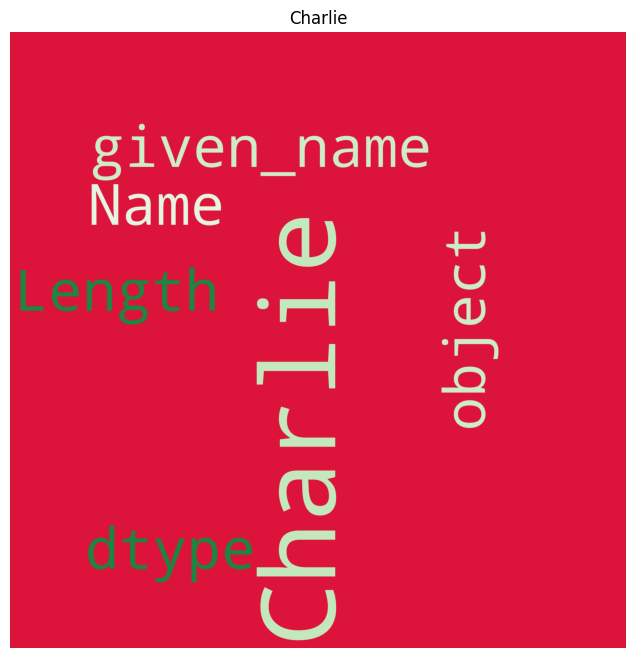

In [17]:


from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = '#DC143C', #MediumAquaMarine the GPT color
                      colormap= "Greens",

                      height =2000,
                      width = 2000
                     ).generate(str(cha["given_name"]))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Charlie")
plt.show()

In [18]:


cha.iloc[21971,2]

"That's a powerful realization, Charlie, and I applaud your determination. Recovery is a journey, and I'm here to support you every step of the way. Can you share some specific goals you have for your recovery?"





![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRb5v7lfHHJr6-k-ql0jtHvldY7a3hkPKI_Ig&usqp=CAU)Medium



Simon Crase https://www.kaggle.com/code/weka511/sort-on-given-names/notebook

Kumar Saksham https://www.kaggle.com/datasets/thedevastator/multi-language-dialogue-dataset-for-gpt-4/discussion/458669#2545644

SRK https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc

mpwolke https://www.kaggle.com/code/mpwolke/questionsanswers-quretec

mpwolke https://www.kaggle.com/code/mpwolke/sort-scientist-name-by-given-name